In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 25
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 82
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
import numpy as np
import pandas as pd

In [3]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [4]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [11]:
string_data = pd.Series(["aardvark", np.nan, None, ""])
string_data

0    aardvark
1         NaN
2        None
3            
dtype: object

In [13]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

In [7]:
float_data = pd.Series([1, 2, None], dtype='float64')
float_data

0    1.0
1    2.0
2    NaN
dtype: float64

In [14]:
float_data.isna()

0    False
1    False
2     True
dtype: bool

In [15]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [16]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [17]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [18]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [20]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [21]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [22]:
data.dropna(axis=1, how='all')


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [23]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [24]:
df.dropna()

,0,1,2
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [25]:
df.dropna(thresh=2)

,0,1,2
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [26]:
df.fillna(0)

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [27]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.204708,0.500000,0.000000
1,-0.555730,0.500000,0.000000
2,0.092908,0.500000,0.769023
3,1.246435,0.500000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [28]:
df = pd.DataFrame(np.random.standard_normal((6, 3)))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,NaN,1.343810
3,-0.713544,NaN,-2.370232
4,-1.860761,NaN,NaN
5,-1.265934,NaN,NaN


In [30]:
df.fillna(method="ffill")

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,0.124121,-2.370232
5,-1.265934,0.124121,-2.370232


In [31]:
df.fillna(method="ffill", limit=2)

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,NaN,-2.370232
5,-1.265934,NaN,-2.370232


In [32]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [33]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [34]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [35]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [36]:
data["v1"] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [37]:

data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [38]:
data.drop_duplicates(["k1", "k2"], keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [41]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                              "pastrami", "corned beef", "bacon",
                              "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [42]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon"
}

In [43]:
data["animal"] = data["food"].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [44]:
data['animal2'] = data['food'].apply(lambda x: meat_to_animal.get(x))

In [45]:
data

,food,ounces,animal,animal2
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,pastrami,6.0,cow,cow
4,corned beef,7.5,cow,cow
5,bacon,8.0,pig,pig
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


In [46]:
def get_animal(x):
    return meat_to_animal[x]
data["food"].map(get_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [47]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [48]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [49]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [50]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [51]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [57]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=["Ohio", "Colorado", "New York"],
                    columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [58]:
def transform(x):
    return x[:4].upper()

data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [59]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [60]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [61]:
data.rename(index={"OHIO": "INDIANA"},
            columns={"three": "peekaboo"})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [4]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [5]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

data = np.array(ages)
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
discretizer.fit_transform(data.reshape(-1, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [3.],
       [2.],
       [2.],
       [1.]])

In [7]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [8]:
age_categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [10]:

pd.value_counts(age_categories)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [11]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [12]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [13]:
data = np.random.uniform(size=20)
pd.cut(data, 4, precision=2)

[(0.73, 0.96], (0.25, 0.49], (0.0074, 0.25], (0.0074, 0.25], (0.49, 0.73], ..., (0.49, 0.73], (0.73, 0.96], (0.73, 0.96], (0.73, 0.96], (0.49, 0.73]]
Length: 20
Categories (4, interval[float64, right]): [(0.0074, 0.25] < (0.25, 0.49] < (0.49, 0.73] < (0.73, 0.96]]

In [15]:
data = np.random.standard_normal(1000)
quartiles = pd.qcut(data, 4, precision=2)
quartiles


[(0.63, 3.93], (0.63, 3.93], (-2.96, -0.69], (-0.69, -0.017], (0.63, 3.93], ..., (-0.017, 0.63], (0.63, 3.93], (-0.69, -0.017], (-0.69, -0.017], (-0.017, 0.63]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.96, -0.69] < (-0.69, -0.017] < (-0.017, 0.63] < (0.63, 3.93]]

In [16]:
pd.value_counts(quartiles)

(-2.96, -0.69]     250
(-0.69, -0.017]    250
(-0.017, 0.63]     250
(0.63, 3.93]       250
dtype: int64

In [17]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]).value_counts()

(-2.9499999999999997, -1.191]    100
(-1.191, -0.0171]                400
(-0.0171, 1.297]                 400
(1.297, 3.928]                   100
dtype: int64

In [26]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.003537,-0.054870,-0.046347,-0.011379
std,1.017100,0.981150,1.005800,1.038571
min,-3.481593,-3.194414,-3.108915,-3.183867
25%,-0.692553,-0.752792,-0.742340,-0.746147
50%,0.042197,-0.055401,-0.034519,0.003852
75%,0.721461,0.613627,0.603749,0.695126
max,2.961194,3.023720,2.916153,3.189940


In [19]:
col = data[2]
col[col.abs() > 3]


269   -3.428254
646    3.366626
Name: 2, dtype: float64

In [27]:
data[(data.abs() > 3).any(axis="columns")]

,0,1,2,3
36,-3.333767,-1.240685,-0.650855,0.076254
117,0.344072,0.581893,-1.116332,-3.018842
142,-0.555434,-0.048478,-3.108915,1.117755
272,-0.217146,-0.274138,1.188742,-3.183867
319,0.744019,1.741426,-2.214074,-3.140963
485,-0.848098,-3.194414,0.077839,-1.733549
515,-0.011807,3.023720,-1.105312,0.105141
544,-3.481593,0.789944,1.737746,-0.875399
712,-0.463276,-0.071320,0.164293,3.082067
740,0.412366,0.617599,-0.843849,3.189940


In [29]:
np.where(data.abs()>3, np.sign(data) * 3, data)

array([[-0.5311,  1.8912, -1.5671, -0.7527],
       [ 1.1636, -0.0716,  2.4979,  1.5669],
       [-0.2765,  0.4766, -0.2755,  0.8316],
       ...,
       [-0.8402, -0.9618, -0.5535, -0.1309],
       [-0.6926, -0.3443, -0.0382, -0.1421],
       [ 0.235 , -0.5429, -1.1865, -0.5122]])

In [30]:
data[data.abs() > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.004523,-0.054655,-0.046238,-0.011308
std,1.013998,0.980337,1.005474,1.036743
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.692553,-0.752792,-0.742340,-0.746147
50%,0.042197,-0.055401,-0.034519,0.003852
75%,0.721461,0.613627,0.603749,0.695126
max,2.961194,3.000000,2.916153,3.000000


In [32]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
df


,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [31]:
sampler = np.random.permutation(5)
sampler

array([3, 4, 2, 1, 0])

In [33]:
df.take(sampler)
df.iloc[sampler]

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13
0,0,1,2,3,4,5,6


In [34]:
column_sampler = np.random.permutation(7)
column_sampler

array([2, 0, 5, 6, 1, 3, 4])

In [35]:
df.take(column_sampler, axis=1)

,2,0,5,6,1,3,4
0,2,0,5,6,1,3,4
1,9,7,12,13,8,10,11
2,16,14,19,20,15,17,18
3,23,21,26,27,22,24,25
4,30,28,33,34,29,31,32


In [37]:
df.sample(n=3, axis=1)

,2,4,5
0,2,4,5
1,9,11,12
2,16,18,19
3,23,25,26
4,30,32,33


In [38]:
choices = pd.Series([5, 7, -1, 6, 4])
choices.sample(n=10, replace=True)

0    5
2   -1
4    4
1    7
3    6
4    4
2   -1
3    6
3    6
2   -1
dtype: int64

In [42]:
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                   "data1": range(6)})
pd.get_dummies(df["key"], prefix='class_type', dtype=float)

,class_type_a,class_type_b,class_type_c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [62]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
new_key = encoder.fit_transform(df[['key']]).toarray()

In [63]:
new_key

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [59]:
df['data1'].to_numpy()[:, np.newaxis].shape

(6, 1)

In [49]:
encoder.get_feature_names_out()

array(['key_a', 'key_b', 'key_c'], dtype=object)

In [64]:
np.c_[df['data1'].to_numpy()[:, np.newaxis], new_key]

array([[0., 0., 1., 0.],
       [1., 0., 1., 0.],
       [2., 1., 0., 0.],
       [3., 0., 0., 1.],
       [4., 1., 0., 0.],
       [5., 0., 1., 0.]])

In [52]:
encoder.categories_[0]

array(['a', 'b', 'c'], dtype=object)

In [43]:
dummies = pd.get_dummies(df["key"], prefix="key", dtype=float)
df_with_dummy = df[["data1"]].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,1.0,0.0,0.0
3,3,0.0,0.0,1.0
4,4,1.0,0.0,0.0
5,5,0.0,1.0,0.0


In [66]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [67]:
dummies = movies["genres"].str.get_dummies("|")
dummies.iloc[:10, :6]

,Action,Adventure,Animation,Children's,Comedy,Crime
0,0,0,1,1,1,0
1,0,1,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,0,0,0,1
6,0,0,0,0,1,0
7,0,1,0,1,0,0
8,1,0,0,0,0,0
9,1,1,0,0,0,0


In [68]:
dummies.shape

(3883, 18)

In [69]:
movies_windic = movies.join(dummies.add_prefix("Genre_"))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [58]:
np.random.seed(12345) # to make the example repeatable
values = np.random.uniform(size=10)
values
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

In [70]:
s = pd.Series([1, 2, 3, None])
s

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [71]:
s.dtype

dtype('float64')

In [72]:
s = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())
s

0       1
1       2
2       3
3    <NA>
dtype: Int64

In [73]:
s.isna()

0    False
1    False
2    False
3     True
dtype: bool

In [74]:
s.dtype

Int64Dtype()

In [75]:
s[3]

<NA>

In [79]:
s[3] is np.nan

False

In [80]:
s = pd.Series([1, 2, 3, None], dtype="Int64")

In [81]:
s = pd.Series(['one', 'two', None, 'three'], dtype=pd.StringDtype())
s

0      one
1      two
2     <NA>
3    three
dtype: string

In [82]:
df = pd.DataFrame({"A": [1, 2, None, 4],
                   "B": ["one", "two", "three", None],
                   "C": [False, None, False, True]})
df
df["A"] = df["A"].astype("Int64")
df["B"] = df["B"].astype("string")
df["C"] = df["C"].astype("boolean")
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,<NA>,True


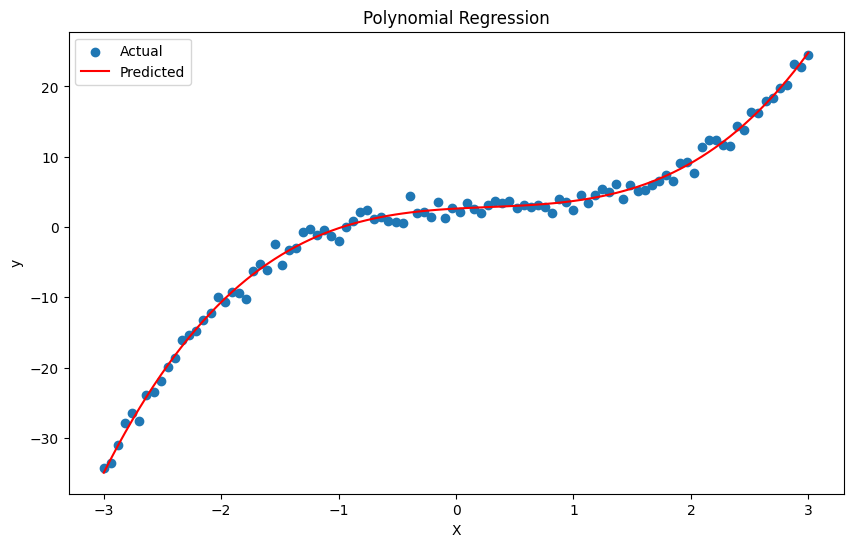

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 生成示例数据
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 - X**2 + X + 3 + np.random.normal(0, 1, X.shape)

# 使用多项式特征变换
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# 构建多项式回归模型
model = LinearRegression()
model.fit(X_poly, y)

# 预测
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_pred = model.predict(X_test_poly)

# 可视化结果
plt.scatter(X, y, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [87]:
val = "a,b,  guido"
val.split(",")

['a', 'b', '  guido']

In [88]:
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'guido']

In [89]:
first, second, third = pieces
first + "::" + second + "::" + third

'a::b::guido'

In [90]:
"::".join(pieces)

'a::b::guido'

In [91]:
"guido" in val

True

In [92]:
val.index(",")

1

In [93]:
val.find(":")

-1

In [94]:
val.index(":")

ValueError: substring not found

In [95]:
val.count(",")

2

In [96]:
val.replace(",", "::")

'a::b::  guido'

In [97]:

val.replace(",", "")

'ab  guido'

In [3]:
import re
text = "foo    bar\t baz  \tqux"
re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

In [74]:
regex = re.compile(r"\s+")
regex.split(text)

In [75]:
regex.findall(text)

In [102]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""
pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

# re.IGNORECASE makes the regex case insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [77]:
regex.findall(text)

In [78]:
m = regex.search(text)
m
text[m.start():m.end()]

In [103]:
regex.match(text)

<re.Match object; span=(0, 15), match='dave@google.com'>

In [80]:
print(regex.sub("REDACTED", text))

In [4]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"
regex = re.compile(pattern, flags=re.IGNORECASE)

In [5]:
m = regex.match("wesm@bright.net")
m.groups()

('wesm', 'bright', 'net')

In [6]:
regex.findall(text)

[]

In [7]:
print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text))

foo    bar	 baz  	qux


In [8]:
data = {"Dave": "dave@google.com", "Steve": "steve@gmail.com",
        "Rob": "rob@gmail.com", "Wes": np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [9]:
data.isna()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [10]:
data.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [11]:
data_as_string_ext = data.astype('string')
data_as_string_ext

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                 <NA>
dtype: string

In [12]:
data_as_string_ext.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes       <NA>
dtype: boolean

In [13]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [14]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]
matches

Dave     (dave, google, com)
Steve    (steve, gmail, com)
Rob        (rob, gmail, com)
Wes                      NaN
dtype: object

In [18]:
matches.str[1]

Dave     google
Steve     gmail
Rob       gmail
Wes         NaN
dtype: object

In [19]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [20]:
data.str.extract(pattern, flags=re.IGNORECASE)

,0,1,2
Dave,dave,google,com
Steve,steve,gmail,com
Rob,rob,gmail,com
Wes,NaN,NaN,NaN


In [30]:
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [41]:
index = values.value_counts().index
decoder = dict((num, cate) for num, cate in enumerate(index))
encoder = dict((cate, num) for num, cate in enumerate(index))

In [43]:
values.map(encoder).map(decoder)

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [25]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])

In [47]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
     - -------------------------------------- 0.3/10.6 MB 7.2 MB/s eta 0:00:02
     -- ------------------------------------- 0.7/10.6 MB 6.9 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/10.6 MB 8.0 MB/s eta 0:00:02
     ---- ----------------------------------- 1.3/10.6 MB 7.5 MB/s eta 0:00:02
     ----- ---------------------------------- 1.6/10.6 MB 7.2 MB/s eta 0:00:02
     ------- -------------------------------- 2.0/10.6 MB 7.4 MB/s eta 0:00:02
     -------- ------------------------------- 2.3/10.6 MB 7.5 MB/s eta 0:00:02
     ---------- ----------------------------- 2.7/10.6 MB 7.4 MB/s eta 0:00:02
     ----------- ---------------------------- 3.0/10.6 MB 7.3 MB/s eta 0:00:02
     ------------ --------------------------- 3.3/10.6 MB 7.3 MB/s eta 0:00:02



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
transformed_values = label_encoder.fit_transform(values)
transformed_values

array([0, 1, 0, 0, 0, 1, 0, 0])

In [49]:
label_encoder.classes_

array(['apple', 'orange'], dtype=object)

In [51]:
label_encoder.inverse_transform(transformed_values)

array(['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple',
       'apple'], dtype=object)

In [27]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [52]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
rng = np.random.default_rng(seed=12345)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, size=N),
                   'weight': rng.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [53]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [54]:
c = fruit_cat.array
type(c)

pandas.core.arrays.categorical.Categorical

In [55]:
c.categories, c.codes

(Index(['apple', 'orange'], dtype='object'),
 array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8))

In [72]:
df['fruit_cate'] = c.codes
df

,basket_id,fruit,count,weight,fruit_cate
0,0,apple,11,1.564438,0
1,1,orange,5,1.331256,1
2,2,apple,12,2.393235,0
3,3,apple,6,0.746937,0
4,4,apple,5,2.691024,0
5,5,orange,12,3.767211,1
6,6,apple,10,0.992983,0
7,7,apple,11,3.795525,0


In [56]:
dict(enumerate(c.categories))

{0: 'apple', 1: 'orange'}

In [61]:
df['fruit'] = df['fruit'].astype('category')
df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [71]:
df['fruit'].array.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [95]:
df['fruit'] = df['fruit'].astype('category')
df['fruit'].cat.codes
df['fruit'].cat.categories

Index(['apple', 'orange'], dtype='object')

In [58]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

In [59]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

In [68]:
my_cats_2.codes

array([0, 1, 2, 0, 0, 1], dtype=int8)

In [60]:
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                        ordered=True)
ordered_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [69]:
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [62]:
rng = np.random.default_rng(seed=12345)
draws = rng.standard_normal(1000)
draws[:5]

array([-1.4238,  1.2637, -0.8707, -0.2592, -0.0753])

In [63]:
bins = pd.qcut(draws, 4)
bins

[(-3.121, -0.675], (0.687, 3.211], (-3.121, -0.675], (-0.675, 0.0134], (-0.675, 0.0134], ..., (0.0134, 0.687], (0.0134, 0.687], (-0.675, 0.0134], (0.0134, 0.687], (-0.675, 0.0134]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.121, -0.675] < (-0.675, 0.0134] < (0.0134, 0.687] < (0.687, 3.211]]

In [64]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

['Q1', 'Q4', 'Q1', 'Q2', 'Q2', ..., 'Q3', 'Q3', 'Q2', 'Q3', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [66]:
bins[:10]

['Q1', 'Q4', 'Q1', 'Q2', 'Q2', 'Q1', 'Q1', 'Q3', 'Q3', 'Q1']
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [73]:
bins = pd.Series(bins, name='quartile')
results = (pd.Series(draws)
           .groupby(bins)
           .agg(['count', 'min', 'max'])
           .reset_index())
results

C:\Users\bruce\AppData\Local\Temp\ipykernel_13632\2483392743.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(bins)


,quartile,count,min,max
0,Q1,250,-3.119609,-0.678494
1,Q2,250,-0.673305,0.008009
2,Q3,250,0.018753,0.686183
3,Q4,250,0.688282,3.211418


In [74]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [75]:
N = 10_000_000
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

In [76]:
categories = labels.astype('category')

In [77]:
labels.memory_usage(deep=True)

600000132

In [78]:
categories.memory_usage(deep=True)

10000544

In [79]:
%time _ = labels.astype('category')

CPU times: total: 109 ms
Wall time: 281 ms


In [81]:
%timeit labels.value_counts()

176 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:

%timeit categories.value_counts()

30.1 ms ± 297 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [84]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [85]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [86]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [87]:
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories)
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [88]:
cat_s.value_counts()

a    2
b    2
c    2
d    2
Name: count, dtype: int64

In [89]:
cat_s2.value_counts()

a    2
b    2
c    2
d    2
e    0
Name: count, dtype: int64

In [90]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [91]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

In [120]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

In [121]:
pd.get_dummies(cat_s, dtype=float)

In [123]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS